













# Project: Wrangling and Analyze Data

In [1]:
#importing necessary libraries
import pandas as pd
import requests
from matplotlib import pyplot as plt
import seaborn as sns
import json
% matplotlib inline
from functools import reduce

## 1.2 Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
wr_df=pd.read_csv("twitter-archive-enhanced.csv")
wr_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url, allow_redirects=True)

open('image_predictions.tsv', 'wb').write(r.content)

335079

In [4]:
import requests
image_url = " https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
  
# URL of the image to be downloaded is defined as image_url
r = requests.get(image_url) # create HTTP response object
  
# send a HTTP request to the server and save
# the HTTP response in a response object called r
with open("image_predictions_tsv",'wb') as f:
  
    # Saving received content as a png file in binary
  # write the contents of the response (r.content)to a new file in binary mode.
    f.write(r.content)

In [5]:
image_pred_df=pd.read_csv("image_predictions_tsv",sep="\t")
image_pred_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [6]:
#Reading a text file line by line 
#Using the text to form a list of dictionaries
with open('tweet-json.txt') as file:
    tweets=[]
    for line in file:
        tweets.append(json.loads(line))

In [7]:
#Create a dataframe from tweet list of dictionaries
#Saving it as a dataframe (tweets_df)
tweets_df=pd.DataFrame(tweets,columns=['id','retweet_count','favorite_count'])
tweets_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [8]:
print (wr_df.info())
print (wr_df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
wr_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1159,724046343203856385,NaN,NaN,2016-04-24 01:24:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sarge. Not even he knows what his tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/724046343...,10,10,Sarge,None,None,None,None
856,764259802650378240,NaN,NaN,2016-08-13 00:38:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kota and her son Benedict. She doesn't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/764259802...,10,10,Kota,None,None,None,None
1448,696405997980676096,NaN,NaN,2016-02-07 18:51:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Berb. He just found out that they have...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/696405997...,7,10,Berb,None,None,None,None
2333,666337882303524864,NaN,NaN,2015-11-16 19:31:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an extremely rare horned Parthenon. No...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666337882...,9,10,an,None,None,None,None
1249,711306686208872448,NaN,NaN,2016-03-19 21:41:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What hooligan sent in pictures w/out a dog in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/711306686...,3,10,None,None,None,None,None


In [10]:
wr_df["source"].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [11]:
wr_df["rating_numerator"].value_counts().head(15)

12     558
11     464
10     461
13     351
9      158
8      102
7       55
14      54
5       37
6       32
3       19
4       17
1        9
2        9
420      2
Name: rating_numerator, dtype: int64

In [12]:
wr_df["rating_denominator"].value_counts().head(10)

10    2333
11       3
50       3
80       2
20       2
2        1
16       1
40       1
70       1
15       1
Name: rating_denominator, dtype: int64

In [13]:
wr_df["name"].value_counts().head(10)

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
Cooper      11
Lola        10
Penny       10
Tucker      10
Bo           9
Name: name, dtype: int64

In [14]:
wr_df["floofer"].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [15]:
wr_df["doggo"].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [16]:
wr_df["pupper"].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [17]:
image_pred_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
386,673350198937153538,https://pbs.twimg.com/media/CVg4bo8WEAANEEE.jpg,1,West_Highland_white_terrier,0.119188,True,quill,0.104014,False,Maltese_dog,0.093944,True
971,706593038911545345,https://pbs.twimg.com/media/Cc5Snc7XIAAMidF.jpg,1,four-poster,0.696423,False,quilt,0.189312,False,pillow,0.029409,False
1155,733109485275860992,https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg,1,golden_retriever,0.945523,True,Labrador_retriever,0.042319,True,doormat,0.003956,False
424,674063288070742018,https://pbs.twimg.com/media/CVrA-rIWEAANxwQ.jpg,1,ostrich,0.661176,False,bearskin,0.214879,False,swab,0.064456,False
855,696713835009417216,https://pbs.twimg.com/media/Cas5h-wWcAA3nAc.jpg,1,car_mirror,0.379797,False,Chesapeake_Bay_retriever,0.321589,True,vizsla,0.116931,True


In [18]:
print (image_pred_df.info())
print (image_pred_df.shape)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB
None
(2075, 12)


In [19]:
image_pred_df.jpg_url.duplicated().sum()

66

In [20]:
image_pred_df["img_num"].head(2)

0    1
1    1
Name: img_num, dtype: int64

In [21]:
image_pred_df["tweet_id"].head(2)

0    666020888022790149
1    666029285002620928
Name: tweet_id, dtype: int64

In [22]:
image_pred_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [23]:
print (tweets_df.info())
print (tweets_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB
None
(2354, 3)


## 1.3 Assessing Data




### 1.3.1 Quality issues
#### 1.3.1.1 twitter-archive-enhanced  (wr_df )
1.Converting column datatypes for example the timestamp column to datetime then extracting the months

2.The rating_denominator values should be standard for accuracy purposes.

3.No need for the replies and retweets rows

4.We dont need the data provided in the following columns: retweeted_status_id,retweeted_status_user_id and retweeted_status_timestamp since we dont need the retweets
    
5.The source url does not work, needs to be split or extract just the valid source

 #### 1.3.1.2 Image predictions (Image_pred_df)
6.The duplicates in jpg_url have to be dropped

7.The P columns have some lower case and some upper case initials
 #### 1.3.1.3 tweet_json.txt (tweets_df)
8.The column by the name 'id' should be renamed  'tweet_id' match the other dataframes




### 1.4 Tidiness issues
1.Columns doggo, floofer, pupper and puppo are in different columns

2.The three tables should be combined to one

## 1.5 Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [24]:
# Make copies of original pieces of data
wr_cleaned=wr_df.copy()
tweets_cleaned=tweets_df.copy()
image_cleaned=image_pred_df.copy()

   ### 1.5.10 Quality Issue 1: Converting the datatype timestamp column to datetime then extracting the months

#### 1.5.10.1 Define:
First convert timestamp to datetime. Then extract year, month and day to new columns. Finally drop timestamp column.

#### 1.5.10.2 Code

In [25]:
# converting timestamp to date time
wr_cleaned['timestamp']=pd.to_datetime(wr_cleaned['timestamp'])
#extracting just the months
months=[dates.strftime('%B') for dates in wr_cleaned['timestamp']]
#labeling the column as month
wr_cleaned['month']=months

#### 1.5.10.3 Test

In [26]:
wr_cleaned.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,month
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,August
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,August
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,July
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,July
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,July


 ### 1.5.20 Quality Issue 2:THE RATING DENOMINATOR HAS TO BE STANDARD FOR ACCURACY

#### 1.5.20.1 Define
The rating denominator has to be 10 allthrough

#### 1.5.20.2 Code


In [27]:
wr_cleaned["rating_denominator"]=10

#### 1.5.20.3 Test

In [28]:
wr_cleaned["rating_denominator"].value_counts()

10    2356
Name: rating_denominator, dtype: int64

### 1.5.30.10 QUALITY ISSUE 4:NO NEED FOR THE REPLIES AND RETWEET ROWS

#### 1.5.30.10.1 Define
   * The 78 replies in the columns 'in_reply_to_user_id' and 'in_reply_to_status_id' have to be dropped
   * The 181 retweets in the following columns have to be dropped(retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp)

   #### 1.5.30.10.2 Code

In [29]:
# removed the replies and retweet columns
wr_cleaned=wr_cleaned[wr_cleaned.in_reply_to_user_id.isnull()]
wr_cleaned=wr_cleaned[wr_cleaned.in_reply_to_status_id.isnull()]
wr_cleaned=wr_cleaned[wr_cleaned.retweeted_status_user_id.isnull()]
wr_cleaned=wr_cleaned[wr_cleaned.retweeted_status_id.isnull()]
wr_cleaned=wr_cleaned[wr_cleaned.retweeted_status_timestamp.isnull()]

In [30]:
wr_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
month                         20

### 1.5.40 QUALITY ISSUE 4:DROPPING UNNECESSARY COLUMNS LIKE THE RETWEETS COLUMN

#### 1.5.40.1 Define
We only need the original tweets not the retweets hence we will drop that column and others that are not needed in the analysis

#### 1.5.40.2 Code

In [31]:
#CODE: Delete columns no needed
wr_cleaned = wr_cleaned.drop([
                        'in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 
                                                    'expanded_urls'], 1)

### 1.5.40.3 Test

In [32]:
wr_cleaned.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,month
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,August
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,August
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,July
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,July
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,July


### 1.5.50 QUALITY ISSUE 5:The source url does not work, needs to be split or extract just the valid source

#### 1.5.50.1 Define
Using string.extract to get just the valid source

#### 1.5.50.2 Code

In [33]:
wr_cleaned["extracted_source"] = wr_cleaned.source.str.extract("\>(.*)\<")
wr_cleaned.drop("source", axis = 1, inplace = True)

#### 1.5.50.3 Test

In [34]:
wr_cleaned["extracted_source"].head()

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
Name: extracted_source, dtype: object

In [35]:
wr_cleaned.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,month,extracted_source
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,August,Twitter for iPhone
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,August,Twitter for iPhone
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,July,Twitter for iPhone
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,July,Twitter for iPhone
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,July,Twitter for iPhone


### 1.5.60 QUALITY ISSUE 5:DROPPING 'jpg_url DUPLICATES 

#### 1.5.60.1 Define
Dropping 66 jpg_url duplicated values

#### 1.5.60.2 Code

In [36]:
#CODE: Delete duplicated jpg_url
image_cleaned = image_cleaned.drop_duplicates(subset=['jpg_url'], keep='last')


#### 1.5.60.3 Test

In [37]:
image_cleaned["jpg_url"].duplicated().sum()

0

### 1.5.70.10 QUALITY ISSUE 6-Image_pred table:The name in the p columns have some upper case initials and lowercase initials

#### 1.5.70.10.1 Define
The first letter will be capitalised for all P columns

#### 1.5.70.10.2 Code


In [38]:
image_cleaned.p1=image_cleaned.p1.str.title()
image_cleaned.p1=image_cleaned.p2.str.title()
image_cleaned.p1=image_cleaned.p3.str.title()

#### 1.5.70.10.3 Test

In [39]:
image_cleaned.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Shetland_Sheepdog,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Rhodesian_Ridgeback,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,Bloodhound,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Miniature_Pinscher,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Doberman,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 1.5.80 QUALITY ISSUE 7-tweets_df table:Renaming of the id column

 #### 1.5.80.1 Define 
Should be renamed to 'tweet_id ' to match the other tables

#### 1.5.80.2 Code

In [40]:
tweets_cleaned.rename(columns={"id":"tweet_id"},inplace=True)

#### 1.5.80.3 Test

In [41]:
tweets_cleaned.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## 1.6 TIDYNESS

### 1.6.10 TIDYNESS ISSUE 1: COMBINING THE DOG COLUMNS


#### 1.6.10.1 define
We create a column by the name dog stage then delete the other columns that represented dog stages

#### 1.6.10.2 Code

In [42]:
# extract the dog stages from the text column
wr_cleaned['dog_stage']=wr_cleaned['text'].str.extract('(doggo|floofer|pupper|puppo)')
#drop the individual column stages
wr_cleaned.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'],inplace=True)

#### Test 1.6.10.2

In [43]:
wr_cleaned.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,month,extracted_source,dog_stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,August,Twitter for iPhone,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,August,Twitter for iPhone,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,July,Twitter for iPhone,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,July,Twitter for iPhone,NaN
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,July,Twitter for iPhone,NaN


### 1.6.20 TIDYNESS 2-MERGING OF THE THREE TABLES

#### 1.6.20.1 Define
Using the reduce function,combine the first two dataframes then combine the result with the third one

#### 1.6.20.2 Code

In [44]:
# list of data frames
dfs=[wr_cleaned,image_cleaned,tweets_cleaned]
#merge into one
merged_df=reduce(lambda left,right:  pd.merge (left,right,on=['tweet_id'],how='left'),dfs)

#### 1.6.20.3 TEST

In [45]:
merged_df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,month,extracted_source,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,August,Twitter for iPhone,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,August,Twitter for iPhone,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,July,Twitter for iPhone,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,July,Twitter for iPhone,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,July,Twitter for iPhone,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048


## 1.7 Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [46]:
merged_df.to_csv('twitter_archive_master.csv', sep=';', index=False)

## 1.8 Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### 1.8.1 INSIGHT 1:DETERMINING THE DOG TYPE WITH THE HIGHEST COUNT

In [47]:
# filling missing values
mean_value=merged_df['favorite_count'].mean()
merged_df['favorite_count'].fillna(value=mean_value, inplace=True)

In [48]:
fav_df=merged_df.groupby('dog_stage',as_index=False)[['favorite_count']].mean()

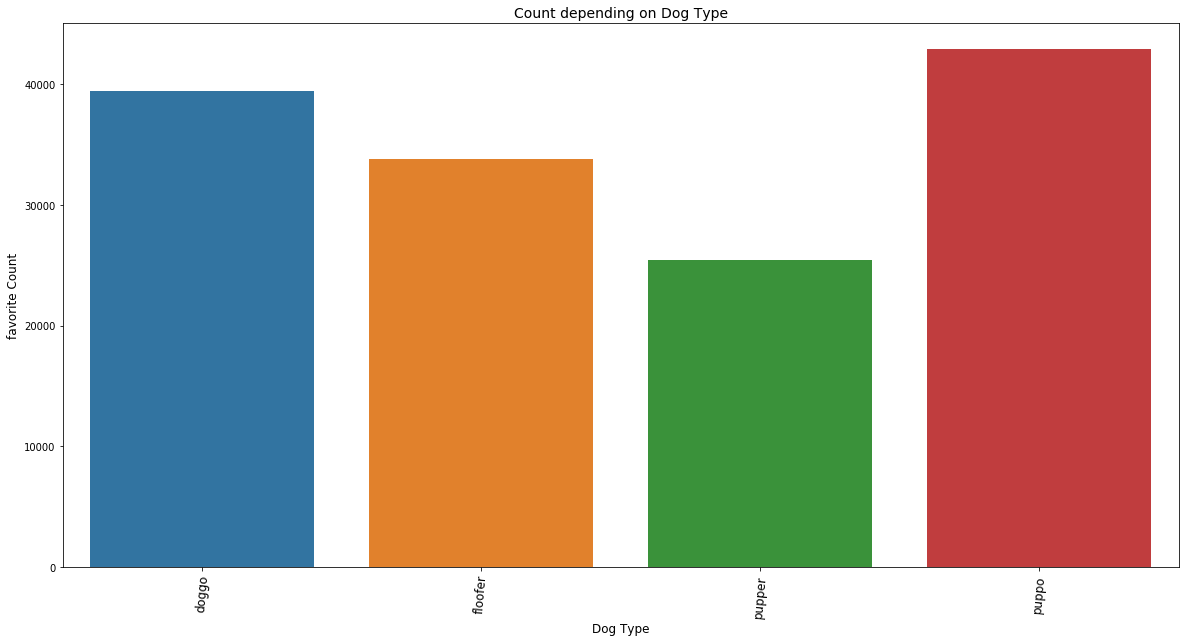

In [49]:
plt.figure(figsize=(20,10))

ax=sns.barplot(x=fav_df["dog_stage"], y=merged_df["favorite_count"])
plt.ylabel('favorite Count',fontsize=12)
plt.xlabel('Dog Type',fontsize=12)
plt.title('Count depending on Dog Type',fontsize=14)
plt.xticks(rotation=85,fontsize=12);
plt.savefig('Count vs Dog Type')

### 1.8.2 Insight 2:DETERMINING THE MONTHS WITH THE HIGHEST NUMBER OF RETWEETS

In [ ]:
month_df=merged_df.groupby('month',as_index=False)[['dog_stage','favorite_count','retweet_count']].mean()

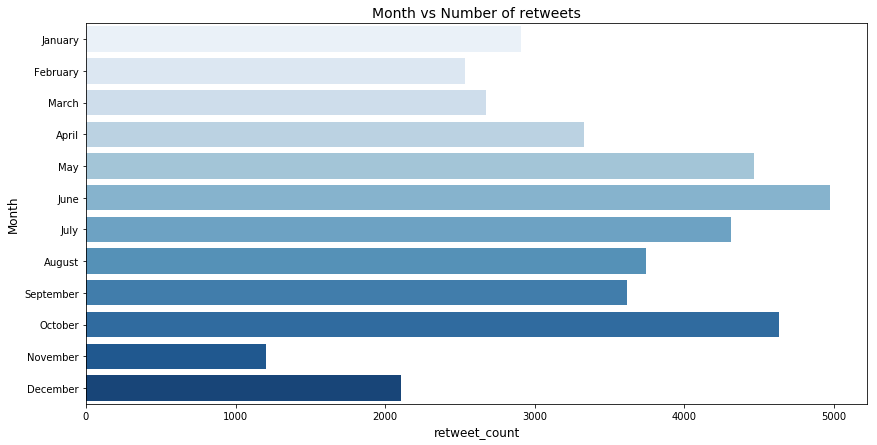

In [51]:
plt.figure(figsize=(14,7))
ax=sns.barplot(y=month_df['month'], x=month_df['retweet_count'],palette='Blues',
              order=['January','February','March','April','May','June','July','August','September',
                    'October','November','December'])
plt.ylabel('Month',fontsize=12)
plt.xlabel('retweet_count',fontsize=12)
plt.title('Month vs Number of retweets',fontsize=14)
plt.savefig('Month vs retweets.png')

### 1.8.3 INSIGHT 3:DETERMINING THE SOURCE POPULARITY

In [53]:
source=merged_df["extracted_source"].value_counts()

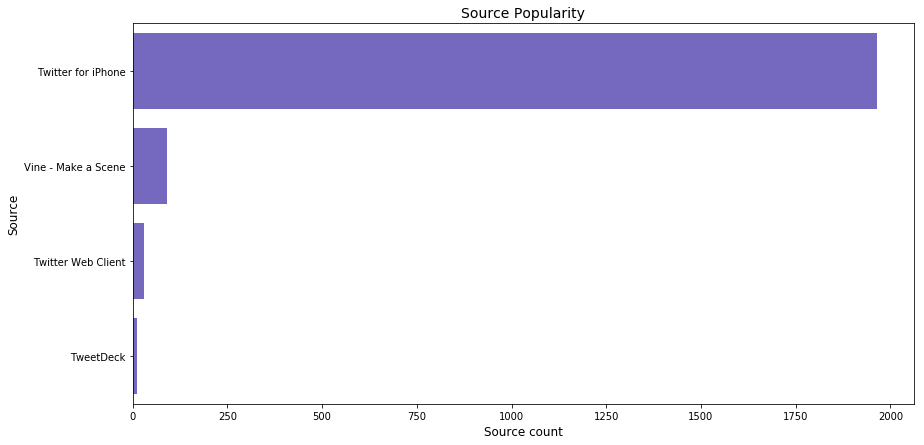

In [54]:
plt.figure(figsize=(14,7))
ax=sns.barplot(y=source.index, x= source,color='slateblue')
plt.xlabel('Source count',fontsize=12)
plt.ylabel('Source',fontsize=12)
plt.title('Source Popularity',fontsize=14)
plt.savefig('Source Count.png')

#### Insights

    1.Doggo and puppo have the most count
    2.May and October have the most number of retweets
    3.Twitter for iphone is the most used source
